<a href="https://colab.research.google.com/github/Polar-Tsai/Lesson_Record/blob/main/0302_regression_%E6%B3%A2%E5%A3%AB%E9%A0%93%E6%88%BF%E5%83%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 【波士頓房價的名詞解釋】

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例(住商比)

INDUS：城鎮非零售業商用土地比例

CHAS：是否鄰近查爾斯河，1是鄰近，0是不鄰近

NOX：一氧化氮濃度（千萬分之一）

RM：住宅的平均房間數

AGE：自住且建於1940年前的房屋比例

DIS：到5個波士頓就業中心的加權距離(距離上班點的距離)

RAD：到高速公路的便利度指数

TAX：每萬元的房產税率

PTRATIO：城鎮學生教師比例(P/T ratio)，學區影響

B： 1000(Bk − 0.63)2 其中Bk是城鎮中黑人比例

LSTAT：低收入人群比例

ans：自住房中位數價格，單位是千元

---

### 必記代稱
* 訓練: train
* 驗證: test
* input: x
* output: y



[sklearn datasets參考](https://scikit-learn.org/stable/datasets/toy_dataset.html)

[scikit-learn](https://scikit-learn.org/stable/)

In [ ]:
import pandas as pd
# 引用波士頓房價為例
from sklearn.datasets import load_boston
boston = load_boston()

# 用pandas整理成表格以便閱讀
df = pd.DataFrame(boston["data"],
          columns = boston["feature_names"])
df["ans"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# 進行ML時，不要用dataframe，而是 **numpy array**
import numpy as np
from sklearn.model_selection import train_test_split
# [題目90, 題目10, 答案90, 答案10]
# test_size: 設定答案(test)要占多少比例
x_train, x_test, y_train, y_test = train_test_split(np.array(boston["data"]),
                            np.array(boston["target"]),
                            test_size = 0.1)
x_train, x_test, y_train, y_test

(array([[1.15779e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.96900e+02, 2.56800e+01],
        [6.66400e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
         3.90960e+02, 5.33000e+00],
        [1.05393e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.86850e+02, 6.58000e+00],
        ...,
        [5.26930e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
         3.82000e+02, 4.63000e+00],
        [1.10874e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.18750e+02, 1.50200e+01],
        [1.88110e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         2.87900e+01, 3.43700e+01]]),
 array([[3.87100e-02, 5.25000e+01, 5.32000e+00, 0.00000e+00, 4.05000e-01,
         6.20900e+00, 3.13000e+01, 7.31720e+00, 6.00000e+00, 2.93000e+02,
         1.66000e+01, 3.96900e+02, 7.14000e+00],
        [8.05579e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01,
         5.42700e+00, 9.54000e+01, 2.42980e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.5258

#決策樹(Decision Tree)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 5) 
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(491.04, 978.48, 'LSTAT <= 9.725\nmse = 83.613\nsamples = 455\nvalue = 22.68'),
 Text(223.2, 761.0400000000001, 'RM <= 7.437\nmse = 77.358\nsamples = 192\nvalue = 29.853'),
 Text(89.28, 543.6, 'DIS <= 1.485\nmse = 42.253\nsamples = 165\nvalue = 27.437'),
 Text(44.64, 326.1600000000001, 'mse = 0.0\nsamples = 5\nvalue = 50.0'),
 Text(133.92000000000002, 326.1600000000001, 'RM <= 6.722\nmse = 27.167\nsamples = 160\nvalue = 26.732'),
 Text(89.28, 108.72000000000003, '\n  (...)  \n'),
 Text(178.56, 108.72000000000003, '\n  (...)  \n'),
 Text(357.12, 543.6, 'CRIM <= 2.654\nmse = 38.305\nsamples = 27\nvalue = 44.615'),
 Text(312.48, 326.1600000000001, 'PTRATIO <= 15.4\nmse = 19.17\nsamples = 26\nvalue = 45.488'),
 Text(267.84000000000003, 108.72000000000003, '\n  (...)  \n'),
 Text(357.12, 108.72000000000003, '\n  (...)  \n'),
 Text(401.76, 326.1600000000001, 'mse = -0.0\nsamples = 1\nvalue = 21.9'),
 Text(758.88, 761.0400000000001, 'LSTAT <= 15.0\nmse = 23.211\nsamples = 263\nvalue = 17

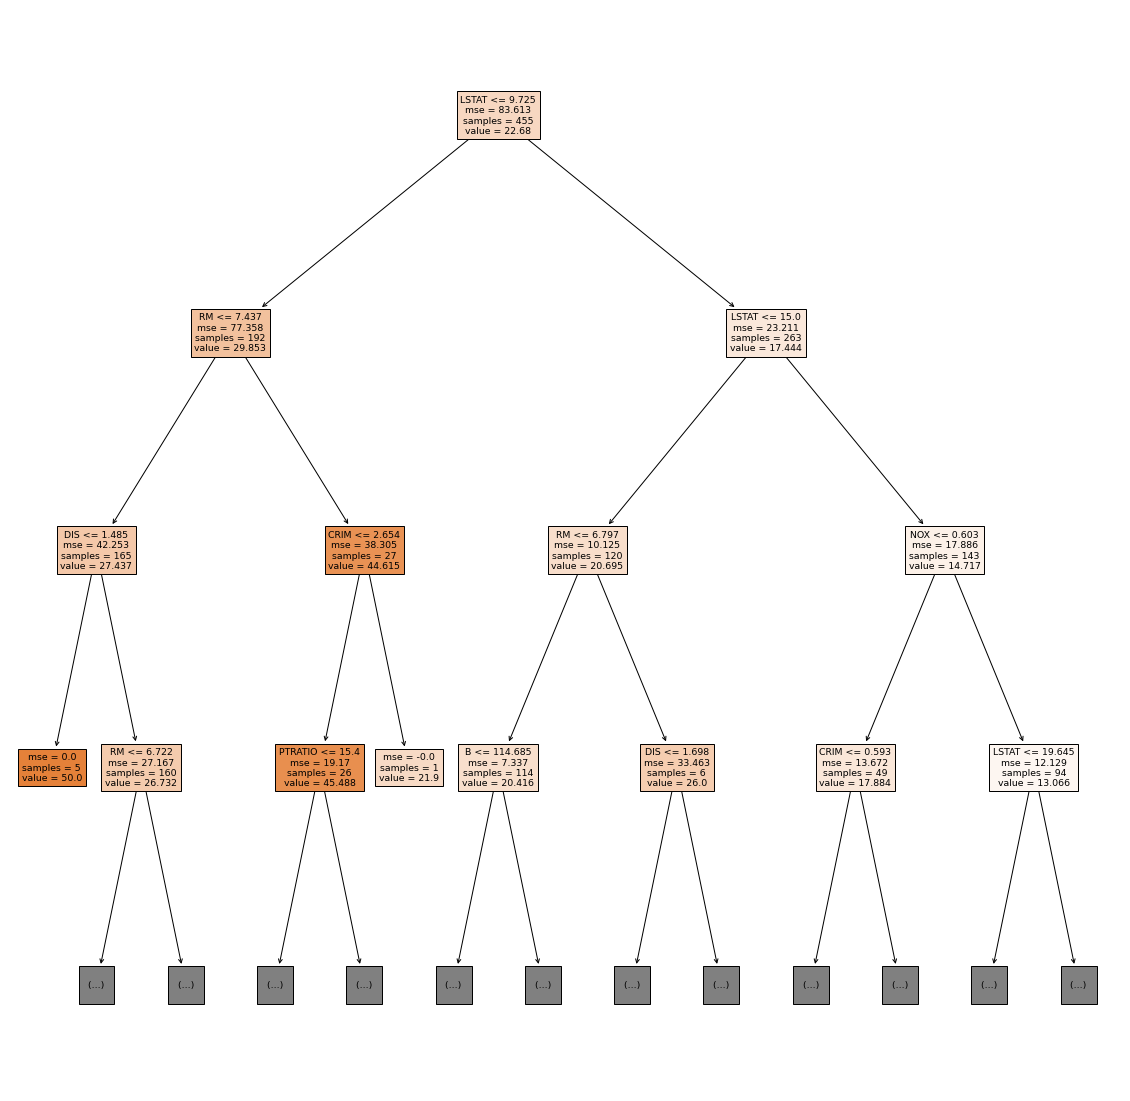

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# 畫成決策樹
plt.figure(figsize = (20, 20))
plot_tree(reg, 
     feature_names = boston["feature_names"], 
     max_depth = 3, # 僅做顯示劃出層數的功用
     filled = True)

#### value = 平均房價


## 迴歸數
* 誤差值/分布越窄越好

### MSE平方誤差(分布範圍)Mean Squared Error:
* (sigma(Pi-平均)^2)/n
* MSE = 0(sample = 50分、50分、50分)

### 迴歸用的度量結果的單位: 

#### 名詞解釋
* x-test(標準答案)
* y-test(預測答案)
* Prei: 每個預測

##### MSE = 1/n(sigma(prei-ytesti)^2)
##### RMSE = MSE^(1/2)
##### MAE = 1/n(sigma|prei - ytesti|

### 結論 
* 利用確切數字跟別人討論時好用
* RAE
* RMSE: 常用(可以讓誤差值大的結果呈現出來)

### 想要把度量單位統一，用以下方法
* A: 1/n((sigma(prei-ytesti)^2) = 認真猜會有多少誤差
* B: 1/n((sigma(ytest的平均)-ytesti)^2) = 都瞎猜平均的話有多少誤差
* r square(平方)score: 比較用
    >* 0: A=0 (每個預測值=正確值) 最佳
    >* 1: A=B (每個預測值=平均) 最爛(瞎猜)
    >* 故: 0(最好) <= A/B <= 1(最爛)
    >* 但是為了方便人類理解，修改如下
    >* r square(平方)score: 0(最爛) <= 1-(A/B) <= 1(最好)
        >>* 只要能>0.5，就很棒棒了
* clf: 80%棒棒
* reg: 0.5棒棒

In [ ]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test) # 預測值
r2_score(y_test, pre)
# 調整max depth可以了解r2_score有沒有好一點
# 目前是覺得max_depth=5可取得較高的r2_score

0.9178619398062656

### gini(猜錯的機率): sigma Pi*(1-Pi)
### Entropy: sigma Pi*log(1/Pi) 

## 擬合問題
### 欠擬合 -> 剛好 -> 過擬合(學習太深入、學習太過稀少的東西)
### 如何檢查「過擬合」?
 * 利用驗證資料
 * 決策樹
  * 前剪枝: 設定「最大深度 max depth」的參數
  * 後剪枝: (scikitlearn不支援)


---
## 決策樹的優點
* 可解釋性很高: 
* 何謂可解釋性: 有意義的AI? 幫助人類學習到新的事物


---

### PyCharm裡出現紅字「找不到dot.exe」
解決方法：
1. 安裝graphviz(選擇windows 2.46.1)
2. install (add to the path for all users)
3. 找到graphviz後，選擇bin > dot.exe
##### 為了讓系統知道執行檔路徑，需要設立path
4. 本機按右鍵 > 內容 > 進階系統設定 > 環境變數 > 系統變數 > path > 編輯 > 找到graphviz
##### 如果找不到，可以自己編輯path
5. 安裝graphviz函式庫
6. 重啟PyCharm(才能吃到Path)


